In [ ]:
# opencv 人脸区域辨识
# SVC 算法，可以识别人脸，叫什么，是谁，训练
# 打卡机，人脸对比

In [55]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [68]:
faces=datasets.fetch_lfw_people(min_faces_per_person=60,resize=1)
faces

{'data': array([[136.33333  , 133.66667  , 130.66667  , ...,   1.6666666,
           0.6666667,   0.6666667],
        [ 79.333336 ,  74.333336 ,  59.666668 , ..., 239.       ,
         241.       , 235.       ],
        [ 69.       ,  83.       , 100.333336 , ..., 239.       ,
         246.       , 241.66667  ],
        ...,
        [ 29.666666 ,  29.666666 ,  29.666666 , ..., 149.33333  ,
         147.       , 133.       ],
        [ 49.666668 ,  49.666668 ,  48.333332 , ..., 178.33333  ,
         166.66667  , 126.333336 ],
        [ 31.333334 ,  33.333332 ,  26.666666 , ...,  48.333332 ,
          63.       ,  99.       ]], dtype=float32),
 'images': array([[[136.33333  , 133.66667  , 130.66667  , ...,  66.666664 ,
           67.       ,  66.       ],
         [139.33333  , 139.66667  , 141.66667  , ...,  68.666664 ,
           67.666664 ,  67.       ],
         [143.66667  , 146.       , 146.       , ...,  68.       ,
           68.333336 ,  68.333336 ],
         ...,
         [ 65.

In [69]:
X=faces["data"]
y=faces["target"]
names=faces.target_names

In [70]:
image=faces["images"]
image.shape

(1348, 125, 94)

'George W Bush'

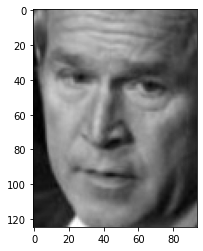

In [71]:
index=np.random.randint(1560,size=1)[0]
plt.imshow(image[index],cmap='gray')
names[y[index]]

In [72]:
X.shape

(1348, 11750)

In [73]:
%%time
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

svc=SVC(kernel="rbf")

svc.fit(x_train,y_train)

print(svc.score(x_test,y_test))

0.7444444444444445
Wall time: 1min 40s


In [74]:
# PCA 主成分分析
# Principal component analysis (PCA)
# whiten 归一化
pca=PCA(n_components=0.9,whiten=True)
X_pca =pca.fit_transform(X)
X_pca.shape

(1348, 115)

In [75]:
%%time
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2)
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

# 73.17628205128202

Wall time: 193 ms


0.7777777777777778

In [77]:
for i in range(8):
    print(names[i],(y==i).sum())

Ariel Sharon 77
Colin Powell 236
Donald Rumsfeld 121
George W Bush 530
Gerhard Schroeder 109
Hugo Chavez 71
Junichiro Koizumi 60
Tony Blair 144


In [81]:
# 过采样
import imblearn
from imblearn.over_sampling import SMOTE

In [98]:
smote=SMOTE()
X2,y2=smote.fit_resample(X,y) # 配置样本均衡

In [86]:
for i in range(8):
    print(names[i],(y2==i).sum())

Ariel Sharon 530
Colin Powell 530
Donald Rumsfeld 530
George W Bush 530
Gerhard Schroeder 530
Hugo Chavez 530
Junichiro Koizumi 530
Tony Blair 530


In [89]:
pca=PCA(n_components=0.9,whiten=True)
X2_pca=pca.fit_transform(X2)


(4240, 96)

In [90]:
X2_pca.shape

(4240, 96)

In [99]:
%%time
x_train,x_test,y_train,y_test=train_test_split(X2_pca,y2,test_size=0.2)
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

Wall time: 755 ms


0.9834905660377359

In [101]:
%%time
face_train,face_test,x_train,x_test,y_train,y_test=train_test_split(X2,X2_pca,y2,test_size=0.2)
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
print(svc.score(x_test,y_test))

y_=svc.predict(x_test)

0.9893867924528302
Wall time: 1.02 s


In [102]:
X2.reshape(125,94)

(4240, 11750)

In [103]:
image.shape

(1348, 125, 94)

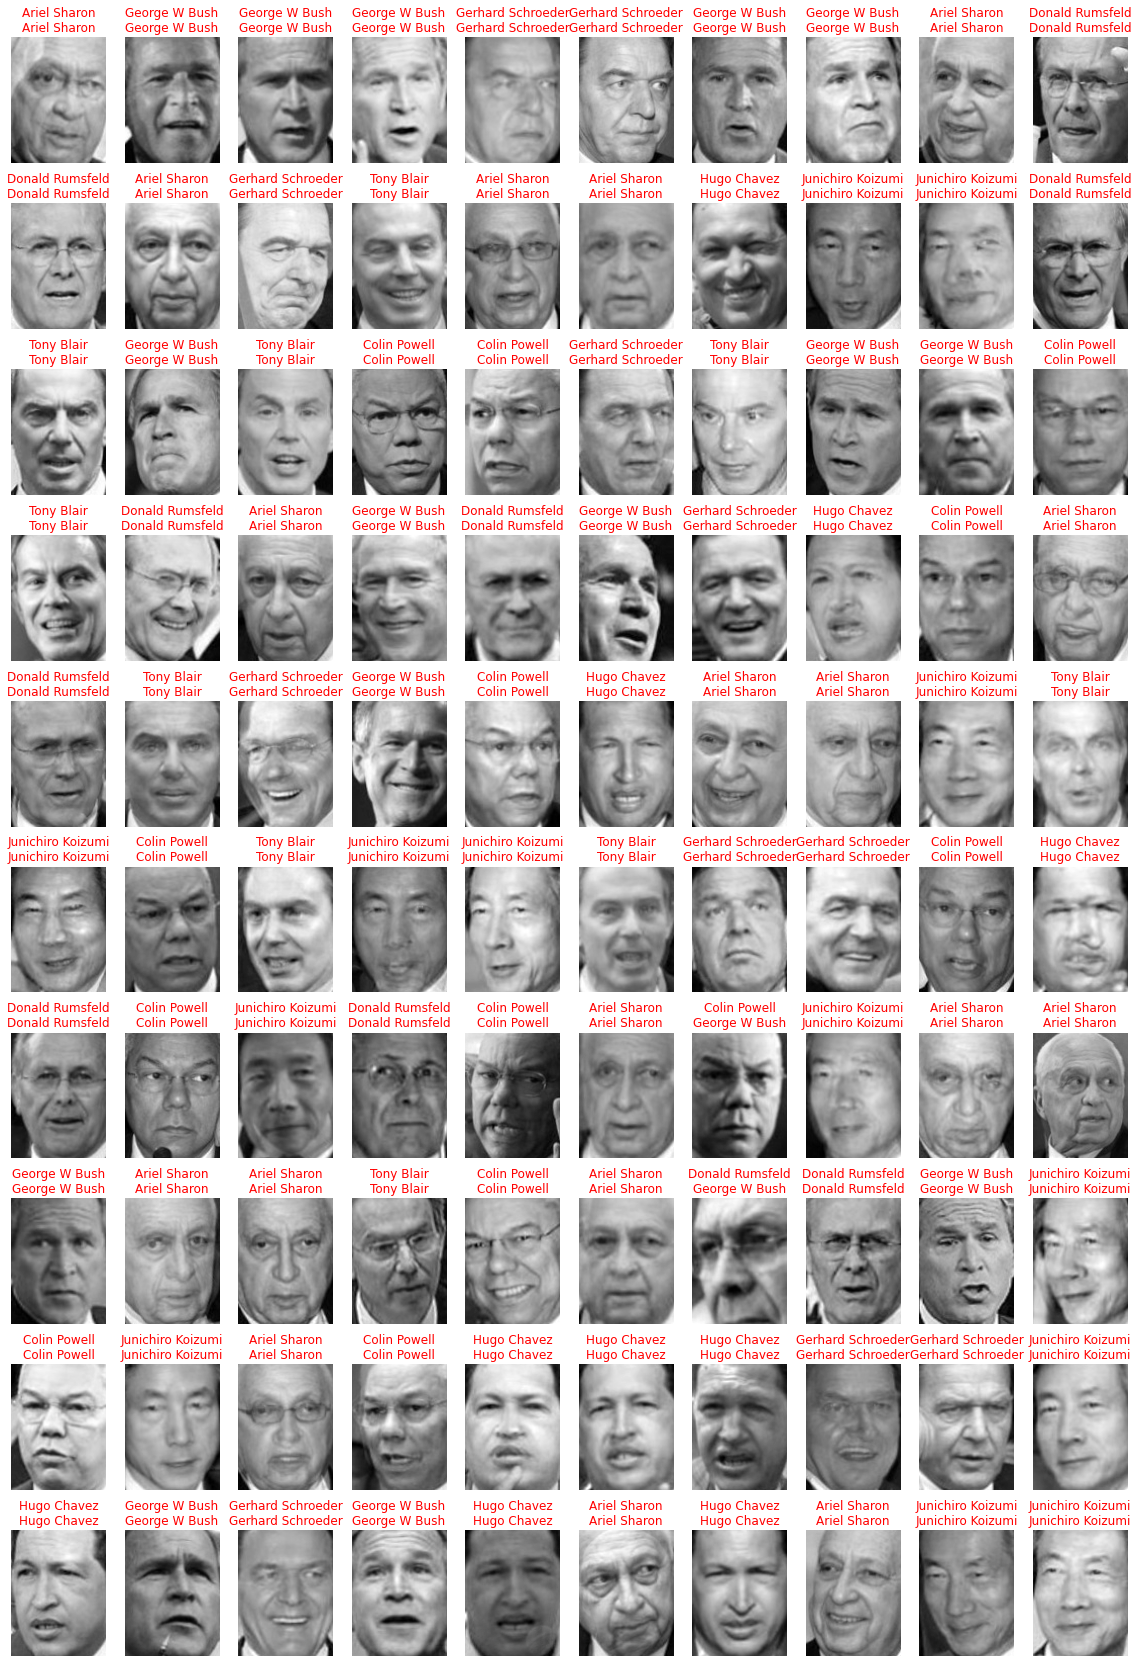

In [110]:
plt.figure(figsize=(10*2,10*3))
for i in range(100):
    ax=plt.subplot(10,10,i+1)
    face=face_test[i].reshape(125,94)
    ax.axis('off')
    ax.imshow(face,cmap="gray")
    t=names[y_test[i]]
    p=names[y_[i]]
    
    ax.set_title("{}\n{}".format(t,p),c="red")
    